# **Download Dataset**

In [ ]:
!gdown --id 1IM93QGxBoZDrfy7DFLfqIC7lpUDnqry0
!unzip fish_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1IM93QGxBoZDrfy7DFLfqIC7lpUDnqry0
To: /content/fish_dataset.zip
10.7MB [00:00, 65.2MB/s]
Archive:  fish_dataset.zip
   creating: dataset/
   creating: dataset/train/
   creating: dataset/train/segar/
  inflating: dataset/train/segar/segar_original_20200517_084015.jpg_15399d48-7d11-43cf-bed1-7d5f19707868.jpg  
  inflating: dataset/train/segar/segar_original_20200517_084015.jpg_2b7c1733-56f0-4588-9863-67ffd6b1bb5b.jpg  
  inflating: dataset/train/segar/segar_original_20200517_084015.jpg_56b81a41-31a0-4258-abd3-2567c3c96730.jpg  
  inflating: dataset/train/segar/segar_original_20200517_084015.jpg_86a7f98d-1b41-4d99-ba98-7a0cd2aabe2e.jpg  
  inflating: dataset/train/segar/segar_original_20200517_084015.jpg_886c0f4d-3389-45f9-928a-33745956ff94.jpg  
  inflating: dataset/train/segar/segar_original_20200517_084015.jpg_9ef90575-ea89-476f-8204-90e91aff3202.jpg  
  inflating: dataset/train/segar/segar_original_20200517_084054.jpg_3f505587-c6cd-

# **Import Libraries**

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Define Directory**

In [ ]:
size = 64
base_dir = '/content/dataset/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
print ("content of train foder:")
os.listdir(train_dir)

content of train foder:


['segar', 'tidak_segar']

In [ ]:
print ("content of val foder:")
os.listdir(val_dir)

content of val foder:


['segar', 'tidak_segar']

# **Image Augmentation**

In [ ]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory(
    train_dir,
    target_size = (size, size),
    batch_size = 4,
    class_mode = 'binary')
test_data = test.flow_from_directory(
    val_dir,
    target_size = (size, size),
    batch_size = 4,
    class_mode = 'binary')

Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


# **Define CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(4, (3, 3), input_shape = (size, size, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 4)         112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3844)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 30760     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


# **Run The Model**

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'])

In [ ]:
model.fit_generator(
    train_data,
    steps_per_epoch = 160,
    epochs = 20,
    validation_data = test_data,
    validation_steps = 160)

Epoch 1/20
160/160 [==============================] - 8s 49ms/step - loss: 0.4509 - binary_accuracy: 0.8125 - val_loss: 0.2275 - val_binary_accuracy: 0.6313
Epoch 2/20
160/160 [==============================] - 7s 47ms/step - loss: 0.3126 - binary_accuracy: 0.9922 - val_loss: 0.3557 - val_binary_accuracy: 0.9750
Epoch 3/20
160/160 [==============================] - 7s 47ms/step - loss: 0.2773 - binary_accuracy: 0.9984 - val_loss: 0.6149 - val_binary_accuracy: 0.7437
Epoch 4/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2493 - binary_accuracy: 1.0000 - val_loss: 0.3710 - val_binary_accuracy: 0.7875
Epoch 5/20
160/160 [==============================] - 7s 47ms/step - loss: 0.2253 - binary_accuracy: 1.0000 - val_loss: 0.3505 - val_binary_accuracy: 0.9125
Epoch 6/20
160/160 [==============================] - 8s 48ms/step - loss: 0.2056 - binary_accuracy: 0.9984 - val_loss: 0.1305 - val_binary_accuracy: 0.9750
Epoch 7/20
160/160 [==============================] - 8s 4

# **Predict Image**

In [ ]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'segar', 1: 'tidak_segar'}


Saving 20200517_145944 (tidak segar).jpg to 20200517_145944 (tidak segar).jpg


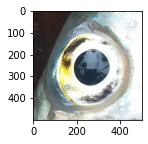

20200517_145944 (tidak segar).jpg
Predicted as  [[1]] labeled as  tidak segar


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn

  def tampilkan_(ini):
    fig = plt.figure(figsize=(2, 2))
    img = plt.imread(ini)
    plt.imshow(img)
    plt.show()

  tampilkan_(path)
  img = image.load_img(path, target_size = (size, size))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  
  print(fn)
  if hasil==0:
    jenis = "segar"
  else:
    jenis = "tidak segar"

  print("Predicted as ", hasil, "labeled as ",jenis)